##  Marketing Campaign Case Study

### John Yin

# 1. Loading Libraries and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


from sklearn.base import TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Mac Path
file_path = "/Users/Phoestia/Desktop/WMDS/Dataset4_GT1Order_NoRecencyFilter_CDD_CaseStudy.csv"

In [ ]:
#Windows Path
file_path = "C:/Users/John.Yin/Desktop/WMDS/Dataset4_GT1Order_NoRecencyFilter_CDD_CaseStudy.csv"

In [5]:
df = pd.read_csv(file_path, header = 0,  encoding='latin-1')

df.head()

,CUSTOMER_ID,Target,Freq. doing online [Pst 2 Mths] - Email - About once or twice a week,Freq. doing online [Pst 2 Mths] - Email - Daily or more,Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week,Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more,Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week,Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more,"Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more",Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week,Freq. doing online [Pst 2 Mths] - Played video games - Daily or more,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - Daily or more,Freq. doing online [Pst 2 Mths] - Read the news - About once or twice a week,Freq. doing online [Pst 2 Mths] - Read the news - Daily or more,Freq. doing online [Pst 2 Mths] - Commented on a news article - About once or twice a week,Freq. doing online [Pst 2 Mths] - Commented on a news article - Daily or more,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - About once or twice a week,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - Daily or more,"Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - Daily or more",Freq. doing online [Pst 2 Mths] - Banking/paid bills - About once or twice a week,Freq. doing online [Pst 2 Mths] - Banking/paid bills - Daily or more,"Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - About once or twice a week","Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - Daily or more","Freq. doing online [Pst 2 Mths] - Applied for a mortgage, loan or credit card - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Researched real estate - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched real estate - Daily or more,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - Daily or more,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - About once or twice a week,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - Daily or more,"Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist) - About once or twice a month,Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Ki

## 2. Data Exploration

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574035 entries, 0 to 574034
Columns: 333 entries, CUSTOMER_ID to LSNAME
dtypes: float64(67), int64(262), object(4)
memory usage: 1.4+ GB


##### Change Object data type to str

In [6]:
df['NAME'] = df['NAME'].astype('str') 
df['SGNAME'] = df['SGNAME'].astype('str') 
df['LSNAME'] = df['LSNAME'].astype('str') 
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('str') 

In [7]:
df.dtypes

CUSTOMER_ID                                                                                                                                             object
Target                                                                                                                                                   int64
Freq. doing online [Pst 2 Mths] - Email - About once or twice a week                                                                                     int64
Freq. doing online [Pst 2 Mths] - Email - Daily or more                                                                                                float64
Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week                                                                         int64
Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more                                                                                    float64
Freq. doing online [Pst 2 Mths] - Contributed 

In [8]:
list(df)

['CUSTOMER_ID',
 'Target',
 'Freq. doing online [Pst 2 Mths] - Email - About once or twice a week',
 'Freq. doing online [Pst 2 Mths] - Email - Daily or more',
 'Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week',
 'Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more',
 'Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week',
 'Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more',
 'Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week',
 'Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more',
 'Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week',
 'Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more',
 'Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week',
 'Freq. doing onli

In [9]:
df.describe()

,Target,Freq. doing online [Pst 2 Mths] - Email - About once or twice a week,Freq. doing online [Pst 2 Mths] - Email - Daily or more,Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week,Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more,Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week,Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more,"Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more",Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week,Freq. doing online [Pst 2 Mths] - Played video games - Daily or more,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - Daily or more,Freq. doing online [Pst 2 Mths] - Read the news - About once or twice a week,Freq. doing online [Pst 2 Mths] - Read the news - Daily or more,Freq. doing online [Pst 2 Mths] - Commented on a news article - About once or twice a week,Freq. doing online [Pst 2 Mths] - Commented on a news article - Daily or more,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - About once or twice a week,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - Daily or more,"Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - Daily or more",Freq. doing online [Pst 2 Mths] - Banking/paid bills - About once or twice a week,Freq. doing online [Pst 2 Mths] - Banking/paid bills - Daily or more,"Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - About once or twice a week","Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - Daily or more","Freq. doing online [Pst 2 Mths] - Applied for a mortgage, loan or credit card - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Researched real estate - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched real estate - Daily or more,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - Daily or more,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - About once or twice a week,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - Daily or more,"Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist) - About once or twice a month,Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Crai

In [10]:
# Count 0

print((df[:]==0).sum())

CUSTOMER_ID                                                                                                                                                 0
Target                                                                                                                                                 561850
Freq. doing online [Pst 2 Mths] - Email - About once or twice a week                                                                                       55
Freq. doing online [Pst 2 Mths] - Email - Daily or more                                                                                                    55
Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week                                                                           55
Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more                                                                                        55
Freq. doing online [Pst 2 Mths] - Contributed to cha

In [ ]:
# Count Null

df.apply(lambda x: sum(x.isnull()),axis=0)

In [12]:
# Count unknown

for i in df.columns:
    if type(df[i][0]) is str:
        print ("unknown value count in "+i+":\t"+str(df[df[i]=='unknown'].count()))

unknown value count in CUSTOMER_ID:	CUSTOMER_ID                                                                                                                                            0
Target                                                                                                                                                 0
Freq. doing online [Pst 2 Mths] - Email - About once or twice a week                                                                                   0
Freq. doing online [Pst 2 Mths] - Email - Daily or more                                                                                                0
Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week                                                                       0
Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more                                                                                    0
Freq. doing online [Pst 2 Mths] - Contributed 

## 3. Split X and Y

In [13]:
NameCol=['NAME','SGNAME','LSNAME']

def splitTargetAndPredictors(df,Target):
    '''seperate the response variable'''
    targetDf=pd.DataFrame(df[Target])
    del df[Target]
    return df,targetDf


In [14]:
x,y=splitTargetAndPredictors(df.copy(),'Target')

In [15]:
x.shape, y.shape

((574035, 332), (574035, 1))

## 4. Split Train and Test

In [100]:
from sklearn.model_selection import train_test_split
x_train_set, x_test_set = train_test_split(x, test_size=0.2, random_state=42)
y_train_set, y_test_set = train_test_split(y, test_size=0.2, random_state=42)

x_train_set.shape, x_test_set.shape

((459228, 332), (114807, 332))

In [52]:
y_train_set.shape, y_test_set.shape

((459228, 1), (114807, 1))

In [18]:
#Drop Hashed Customer ID
#In real case can unhash by mapping with hash reference table
x_train_set=x_train_set.drop("CUSTOMER_ID", axis=1)
x_test_set=x_test_set.drop("CUSTOMER_ID", axis=1)

## 5. Discover and visulize the data to gain insights

## Plots

In [19]:
def Plot(cat = "category"):
    if cat == "category":
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 10
        fig_size[1] = 4

        cols = [col for col in df.columns if col not in NameCol and col!="Target"]
        for col in cols:
            ptl = df.groupby([col])['Target'].mean()
            ptl = pd.DataFrame(ptl,index=df[col].unique())
#             ptl = ptl.sort("Target")
            ptl.plot.barh()
            plt.title(col+ " vs Target")
    else:
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 10
        fig_size[1] = 4

        cols = [col for col in df.columns if col not in NameCol and col!="Target"]

        for col in cols:
            ptl = df.groupby([col])['Target'].mean()
            ptl = pd.DataFrame(ptl)
            ptl.plot(color='r')
            if col == "NAME"or col=="SGNAME" or col=="LSNAME":
                plt.xticks(np.arange(0,16,2))
            plt.title(col+ " vs Target")
    return None

In [ ]:
Plot()

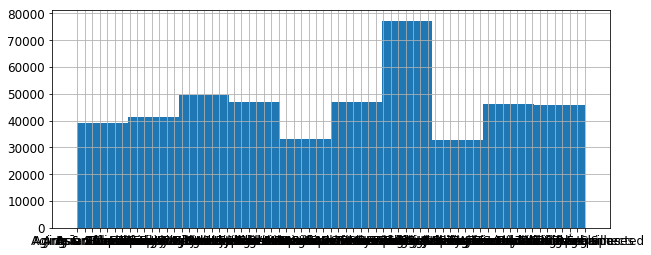

In [21]:
x_train_set["NAME"].hist()

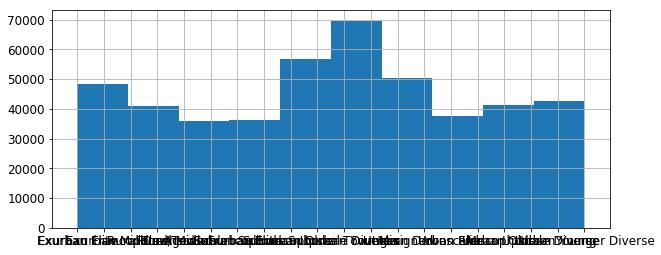

In [22]:
x_train_set["SGNAME"].hist()

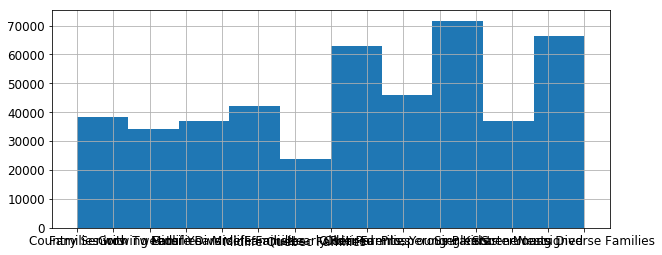

In [23]:
x_train_set["LSNAME"].hist()

In [ ]:
corr_matrix = df.corr()
corr_matrix["Target"].sort_values(ascending=False)

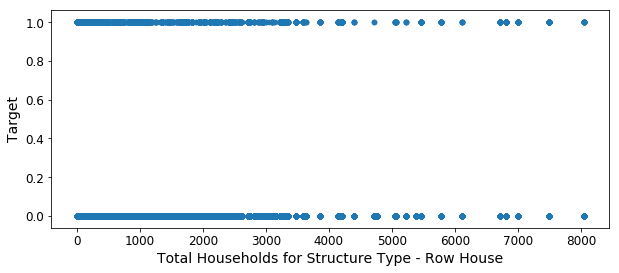

In [27]:
df.plot(kind="scatter", x="Total Households for Structure Type - Row House", y="Target",
             alpha=0.2)
plt.show()

## 6. Feature transformation

## 6.1 One hot encoding for 3 Name Columns

In [28]:
df['NAME'].unique()

array(['Unclassified', 'Rustic Roads', 'Fresh Air Families',
       'Outdoor Originals', "Lunch at Tim's", 'Country Acres',
       'Wide Open Spaces', 'Traditional Town Living', 'Aging & Active',
       'Serenity Springs', 'Exurban Homesteaders', 'Emptying Nests',
       'Exurban Wonderland', 'Heartland Retirees',
       'First Nations Families', 'Pets & PCs', 'Urbane Villagers',
       'Kids & Careers', 'Boomerang City', 'Satellite Burbs', 'Our Time',
       'Second City Retirees', 'Grey Pride', 'Striving Startups',
       'Suburban Success', 'Low-Rise Renters', 'Street Scenes',
       'Sunset Towers', 'Aging in Suburbia', 'Trucks & Trades',
       'Suburban Scramble', 'Home Sweet Rows', 'Silver Linings',
       'Management Material', 'Grads & Pads', 'Single City Jazz',
       'New World Symphony', 'Terre à Terre', 'Metro Multiculturals',
       'Young & Connected', 'Urban Digerati', 'Cosmopolitan Elite',
       'Rooms with a View', 'Heritage Hubs', 'Diversity Heights',
       'Mini V

In [29]:
NAME=x_train_set["NAME"]
SGNAME=x_train_set["SGNAME"]
LSNAME=x_train_set["LSNAME"]

In [30]:
LSNAME.head()

452876    Older Parents, Younger Kids
280282                 Older Families
377723             Prosperous Parents
320239                 Older Families
337902         Young Diverse Families
Name: LSNAME, dtype: object

In [31]:
SGNAME.head()

452876         Exurban Middle-Aged
280282    Suburban Upscale Diverse
377723               Exurban Elite
320239       Urban Upscale Diverse
337902       Urban Younger Diverse
Name: SGNAME, dtype: object

In [55]:
NAME_encoded, NAME_categories = NAME.factorize()
NAME_encoded

array([ 0,  1,  2, ..., 14, 11, 67])

In [33]:
NAME_categories

Index(['Fresh Air Families', 'Diversity Heights', 'Satellite Burbs',
       'Asian Avenues', 'Newcomers Rising', 'Enclaves Multiethniques',
       'Heartland Retirees', 'Striving Startups', 'Pets & PCs', 'Rustic Roads',
       'Home Sweet Rows', 'Unclassified', 'Asian Sophisticates',
       'Rooms with a View', 'Diverse City', 'Boomerang City', 'Heritage Hubs',
       'Lunch at Tim's', 'Trucks & Trades', 'Serenity Springs', 'Our Time',
       'Aging in Suburbia', 'Exurban Wonderland', 'Street Scenes',
       'Country Acres', 'Silver Linings', 'Fête au Village',
       'South Asian Achievers', 'Wide Open Spaces', 'Emptying Nests',
       'Aging & Active', 'Low-Rise Renters', 'Grads & Pads', 'Kids & Careers',
       'Bons Vivants', 'Metro Multiculturals', 'Suburban Scramble',
       'Urban Digerati', 'New World Symphony', 'Vieille École',
       'Variété Suburbaine', 'South Asian Society', 'Second City Retirees',
       'Mini Van & Vin Rouge', 'Terre à Terre', 'Suburban Success',
       

In [53]:
SGNAME_encoded, SGNAME_categories = SGNAME.factorize()
SGNAME_encoded

array([ 0,  1,  2, ...,  3,  9, 18])

In [35]:
SGNAME_categories

Index(['Exurban Middle-Aged', 'Suburban Upscale Diverse', 'Exurban Elite',
       'Urban Upscale Diverse', 'Urban Younger Diverse', 'Urban Francophone',
       'Rural Downscale', 'Urban Downscale', 'Suburban Younger', 'Unassigned',
       'Urban Elite', 'Town Mix', 'Suburban Older', 'Urban Young',
       'Rural Midscale', 'Urban Older', 'Rural/Town Francophone',
       'Suburban Elite', 'Suburban Francophone', 'Exurban Francophone'],
      dtype='object')

In [54]:
LSNAME_encoded, LSNAME_categories = LSNAME.factorize()
LSNAME_encoded

array([0, 1, 2, ..., 1, 7, 4])

In [37]:
LSNAME_categories

Index(['Older Parents, Younger Kids', 'Older Families', 'Prosperous Parents',
       'Young Diverse Families', 'Starter Nests', 'Country Seniors',
       'Midlife Diverse Families', 'Unassigned', 'Singles Scene',
       'Midlife Families', 'Growing Families', 'Later Years', 'Nearly Retired',
       'Families with Tweens', 'Midlife Quebec Families'],
      dtype='object')

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
NAME_1hot = encoder.fit_transform(NAME_encoded.reshape(-1,1))
NAME_1hot

<459228x69 sparse matrix of type '<class 'numpy.float64'>'
	with 459228 stored elements in Compressed Sparse Row format>

In [63]:
NAME_1hot.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [40]:
SGNAME_1hot = encoder.fit_transform(SGNAME_encoded.reshape(-1,1))
SGNAME_1hot.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [41]:
LSNAME_1hot = encoder.fit_transform(LSNAME_encoded.reshape(-1,1))
LSNAME_1hot.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# result = pd.concat([x_train_set, NAME_1hot], axis=1, join='outer')
result = pd.concat([x_train_set,NAME_1hot],axis=1)

result

In [101]:
NAME=pd.get_dummies(x_train_set['NAME'],drop_first=True, prefix='NAME')

SGNAME=pd.get_dummies(x_train_set['SGNAME'],drop_first=True, prefix='SGNAME')

LSNAME=pd.get_dummies(x_train_set['LSNAME'],drop_first=True, prefix='LSNAME')


x_train_set.drop(['NAME','SGNAME','LSNAME'],axis=1,inplace=True)

x_train_set.dropna(inplace=True)

x_train_set=pd.concat([x_train_set,NAME, SGNAME, LSNAME],axis=1)

x_train_set.head(10)

,CUSTOMER_ID,Freq. doing online [Pst 2 Mths] - Email - About once or twice a week,Freq. doing online [Pst 2 Mths] - Email - Daily or more,Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week,Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more,Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week,Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more,"Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more",Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week,Freq. doing online [Pst 2 Mths] - Played video games - Daily or more,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - Daily or more,Freq. doing online [Pst 2 Mths] - Read the news - About once or twice a week,Freq. doing online [Pst 2 Mths] - Read the news - Daily or more,Freq. doing online [Pst 2 Mths] - Commented on a news article - About once or twice a week,Freq. doing online [Pst 2 Mths] - Commented on a news article - Daily or more,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - About once or twice a week,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - Daily or more,"Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - Daily or more",Freq. doing online [Pst 2 Mths] - Banking/paid bills - About once or twice a week,Freq. doing online [Pst 2 Mths] - Banking/paid bills - Daily or more,"Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - About once or twice a week","Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - Daily or more","Freq. doing online [Pst 2 Mths] - Applied for a mortgage, loan or credit card - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Researched real estate - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched real estate - Daily or more,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - Daily or more,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - About once or twice a week,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - Daily or more,"Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist) - About once or twice a month,Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or

In [103]:
x_train_set.tail(20)

,CUSTOMER_ID,Freq. doing online [Pst 2 Mths] - Email - About once or twice a week,Freq. doing online [Pst 2 Mths] - Email - Daily or more,Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week,Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more,Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week,Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more,"Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more",Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week,Freq. doing online [Pst 2 Mths] - Played video games - Daily or more,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - Daily or more,Freq. doing online [Pst 2 Mths] - Read the news - About once or twice a week,Freq. doing online [Pst 2 Mths] - Read the news - Daily or more,Freq. doing online [Pst 2 Mths] - Commented on a news article - About once or twice a week,Freq. doing online [Pst 2 Mths] - Commented on a news article - Daily or more,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - About once or twice a week,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - Daily or more,"Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - Daily or more",Freq. doing online [Pst 2 Mths] - Banking/paid bills - About once or twice a week,Freq. doing online [Pst 2 Mths] - Banking/paid bills - Daily or more,"Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - About once or twice a week","Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - Daily or more","Freq. doing online [Pst 2 Mths] - Applied for a mortgage, loan or credit card - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Researched real estate - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched real estate - Daily or more,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - Daily or more,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - About once or twice a week,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - Daily or more,"Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist) - About once or twice a month,Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or

In [104]:
x_train_set.describe()

,Freq. doing online [Pst 2 Mths] - Email - About once or twice a week,Freq. doing online [Pst 2 Mths] - Email - Daily or more,Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week,Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more,Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week,Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more,"Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more",Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week,Freq. doing online [Pst 2 Mths] - Played video games - Daily or more,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - Daily or more,Freq. doing online [Pst 2 Mths] - Read the news - About once or twice a week,Freq. doing online [Pst 2 Mths] - Read the news - Daily or more,Freq. doing online [Pst 2 Mths] - Commented on a news article - About once or twice a week,Freq. doing online [Pst 2 Mths] - Commented on a news article - Daily or more,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - About once or twice a week,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - Daily or more,"Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - Daily or more",Freq. doing online [Pst 2 Mths] - Banking/paid bills - About once or twice a week,Freq. doing online [Pst 2 Mths] - Banking/paid bills - Daily or more,"Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - About once or twice a week","Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - Daily or more","Freq. doing online [Pst 2 Mths] - Applied for a mortgage, loan or credit card - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Researched real estate - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched real estate - Daily or more,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - Daily or more,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - About once or twice a week,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - Daily or more,"Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist) - About once or twice a month,Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist)

## 6.2 Dealing with Missing Values

### Impute

In [110]:
x_train_set.dtypes

Freq. doing online [Pst 2 Mths] - Email - About once or twice a week                                                                                   float64
Freq. doing online [Pst 2 Mths] - Email - Daily or more                                                                                                float64
Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week                                                                       float64
Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more                                                                                    float64
Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week                                            float64
Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more                                                         float64
Freq. doing online [Pst 2 Mths] - Online datin

In [109]:
#Drop Hashed Customer ID
#In real case can unhash by mapping with hash reference table
x_train_set=x_train_set.drop("CUSTOMER_ID", axis=1)
x_test_set=x_test_set.drop("CUSTOMER_ID", axis=1)

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

x_train_tr = num_pipeline.fit_transform(x_train_set)

In [112]:
x_train_tr

array([[ -5.44763304e-02,  -2.05927159e-03,  -3.64371491e-03, ...,
         -2.95715267e-01,   4.88378386e+00,  -3.41457518e-01],
       [ -5.44763304e-02,  -2.05927159e-03,  -3.64371491e-03, ...,
         -2.95715267e-01,  -2.04759266e-01,  -3.41457518e-01],
       [ -5.44763304e-02,  -2.05927159e-03,  -3.64371491e-03, ...,
         -2.95715267e-01,  -2.04759266e-01,  -3.41457518e-01],
       ..., 
       [  5.98797525e-01,   4.58724134e-01,   2.85934812e-01, ...,
         -2.95715267e-01,  -2.04759266e-01,  -3.41457518e-01],
       [  5.98797525e-01,   4.58724134e-01,   2.85934812e-01, ...,
         -2.95715267e-01,  -2.04759266e-01,  -3.41457518e-01],
       [  5.98797525e-01,   4.58724134e-01,   2.85934812e-01, ...,
         -2.95715267e-01,  -2.04759266e-01,  -3.41457518e-01]])

In [114]:
x_train_tr.shape

(459228, 429)

In [116]:
# add back column names

x_train = pd.DataFrame(x_train_tr, columns = x_train_set.columns)

In [118]:
x_train.head()

,Freq. doing online [Pst 2 Mths] - Email - About once or twice a week,Freq. doing online [Pst 2 Mths] - Email - Daily or more,Freq. doing online [Pst 2 Mths] - Instant messaging - About once or twice a week,Freq. doing online [Pst 2 Mths] - Instant messaging - Daily or more,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - About once or twice a week,Freq. doing online [Pst 2 Mths] - Contributed to chat room/blog/bulletin board - Daily or more,Freq. doing online [Pst 2 Mths] - Online dating/relationship - About once or twice a week,Freq. doing online [Pst 2 Mths] - Online dating/relationship - Daily or more,"Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Downloaded (music, games, software) - Daily or more",Freq. doing online [Pst 2 Mths] - Played video games - About once or twice a week,Freq. doing online [Pst 2 Mths] - Played video games - Daily or more,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited entertainment/gossip sites - Daily or more,Freq. doing online [Pst 2 Mths] - Read the news - About once or twice a week,Freq. doing online [Pst 2 Mths] - Read the news - Daily or more,Freq. doing online [Pst 2 Mths] - Commented on a news article - About once or twice a week,Freq. doing online [Pst 2 Mths] - Commented on a news article - Daily or more,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - About once or twice a week,Freq. doing online [Pst 2 Mths] - Reviewed/rated a product or service - Daily or more,"Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - About once or twice a week","Freq. doing online [Pst 2 Mths] - Searched classifieds (Kijiji, Craigslist ) - Daily or more",Freq. doing online [Pst 2 Mths] - Banking/paid bills - About once or twice a week,Freq. doing online [Pst 2 Mths] - Banking/paid bills - Daily or more,"Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - About once or twice a week","Freq. doing online [Pst 2 Mths] - Traded stocks, bonds, mutual funds - Daily or more","Freq. doing online [Pst 2 Mths] - Applied for a mortgage, loan or credit card - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Researched insurance (home, life, etc) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Researched real estate - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched real estate - Daily or more,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - About once or twice a week,Freq. doing online [Pst 2 Mths] - Researched/made travel arrangements - Daily or more,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - About once or twice a week,Freq. doing online [Pst 2 Mths] - Clicked on a banner advertisement - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the address on TV - Daily or more,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - About once or twice a week,Freq. doing online [Pst 2 Mths] - Visited a website after seeing the website in print - Daily or more,"Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - About once or twice a month","Freq. doing online [Pst 2 Mths] - Made a purchase through a group-buying site (Groupon, Teambuy) - More than once or twice a week",Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist) - About once or twice a month,Freq. doing online [Pst 2 Mths] - Made a purchase of a second-hand item through a site (e.g. Kijiji or Craigslist)

## 7. Demension Reduction and Feature Selection

### 7.1 Use PCA for Demension Reduction

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 150)
pca.fit(x_train_tr)

#The amount of variance that each PC explains
var = pca.explained_variance_ratio_

#Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

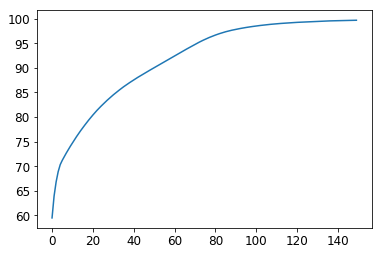

In [128]:
#Check Cumulative Variance plot
plt.plot(var1)

##### From Cumulative Variance plot we can see that around 140 components are explaining nearly 100% variability of actual data, and around 30 components explaining nearly 85% variability of actual data.

##### So we will proceed with only 30 components for further modelling.¶

In [143]:
pca = PCA(n_components=30)
pca.fit(x_train_tr)
x_train_PC=pca.fit_transform(x_train_tr)

### 7.2 Feature Selection with Random Forest (Holding till the end see accuracy)

In [ ]:
# Create a random forest classifier
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the classifier
forest_clf.fit(x_train, y_train_set)

# Print the name and gini importance of each feature
for feature in zip(x_train.columns, forest_clf.feature_importances_):
    print(feature)

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(forest_clf, threshold=0.15)
sfm.fit(x_train, y_train_set)

## 8. Model Trainig

In [144]:
seed = 42
scoring = 'accuracy'

In [145]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_PC, y_train_set, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

###### LR: 0.978788 (0.000448)
###### LDA: 0.978788 (0.000448)
###### K-NN: 0.978749 (0.000479)
###### CART: 0.969375 (0.010675)
###### NB: 0.978788 (0.000448)

##### Lofitic Regression, Linear Discriminat Analysis, Gaussian NB and Support Vector Machine have highest Accuracy 

##### Support Vector Machine is taking longest time compare to other algorithms for Training.

##### Logistic Regression is also has nearly same accuracy and it is very fast.

For SVM should change n_job, or use Bagging Classifier, with better scaler, so that might run faster.

## 9. Model Selection

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'K-NN'),
 Text(0,0,'CART'),
 Text(0,0,'NB')]

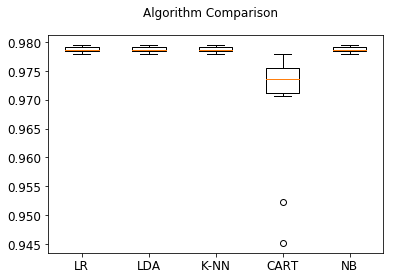

In [149]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## 10. Validation

In [ ]:
# One hot encode

NAME=pd.get_dummies(x_test_set['NAME'],drop_first=True, prefix='NAME')

SGNAME=pd.get_dummies(x_test_set['SGNAME'],drop_first=True, prefix='SGNAME')

LSNAME=pd.get_dummies(x_test_set['LSNAME'],drop_first=True, prefix='LSNAME')


x_test_set.drop(['NAME','SGNAME','LSNAME'],axis=1,inplace=True)

x_test_set.dropna(inplace=True)

x_test_set=pd.concat([x_test_set,NAME, SGNAME, LSNAME],axis=1)


In [ ]:
#Drop Hashed Customer ID
#In real case can unhash by mapping with hash reference table
x_test_set=x_test_set.drop("CUSTOMER_ID", axis=1)

In [153]:
# Impute

x_test_tr = num_pipeline.fit_transform(x_test_set)

In [154]:
# add back column names

x_test = pd.DataFrame(x_test_tr, columns = x_test_set.columns)

In [155]:
#Scaling the X_validation data
x_v = scale(x_test)

pca.fit(x_v)
x_test_PC=pca.fit_transform(x_v)

In [156]:
# Make predictions on validation dataset by choosing best Algorithm
# Precision = tp/(tp+FP)
# Recall = TP/(TP+FN)
lr = LogisticRegression()
lr.fit(x_train_PC, y_train_set)
predictions = lr.predict(x_test_PC)
print("Accuracy : ", accuracy_score(y_test_set, predictions))
print(confusion_matrix(y_test_set, predictions))
print(classification_report(y_test_set, predictions))

Accuracy :  0.978712099436
[[112363      0]
 [  2444      0]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    112363
          1       0.00      0.00      0.00      2444

avg / total       0.96      0.98      0.97    114807



Next can plot: 
ROC (Receiver operating characteristic curve:TP/FP); 
AUC(Area Under the ROC curve)